# Proyecto K-Means

In [50]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para poder utilizar el modelo K-Means:
from sklearn.cluster import KMeans

# Librería para poder hacer gráficos:
import matplotlib.pyplot as plt

# Libería para poder hacer gráficos en 3D:
from mpl_toolkits.mplot3d import Axes3D

# Librería para medir la precisión:
from sklearn.metrics import accuracy_score

# Librería para poder obtener valores aleatorios enteros:
from scipy.stats import randint

# Librería para utilizar modelos de optimización de hiperparámetros:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Librería para utilizar el algoritmo clasificador Boosting:
from sklearn.ensemble import GradientBoostingClassifier

# Librería para utilizar bosques aleatorios clasificadores:
from sklearn.ensemble import RandomForestClassifier



## Paso 1 - Lectura de Datos:

En primer lugar, es necesario **leer y guardar la información** en una variable para poder empezar a trabajar con ella. 

Para ello, se ha guardado el archivo con todos los datos en la ruta: */workspaces/4GeeksAcademy-unsupervised-learning-clara-ab/data/raw/housing.csv* y se ha cargado en un Data Frame:

In [29]:
# Lectura del CSV con los datos, dada la ruta donde se guarda el archivo:
df = pd.read_csv ('/workspaces/4GeeksAcademy-unsupervised-learning-clara-ab/data/raw/housing.csv');

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncarlas al visualizarlo
pd.set_option('display.max_columns', None);

# Se muestran las 5 primeras filas del Data Frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Una vez se ha cargado correctamente la información en el Data Frame es interesante evaluar la **cantidad de información que se tiene**. Para ello, se recurre al atributo `.shape` del Data Frame:

In [30]:
# Se utiliza el atributo shape del Data Frame para conocer cuánta información está cargada:
print (f" El conjunto de datos cuenta con información de {df.shape[0]} grupos censales con un total de {df.shape[1]} características sobre ellos");

 El conjunto de datos cuenta con información de 20640 grupos censales con un total de 9 características sobre ellos


Como se indica en las instrucciones del proyecto, solo interesan **tres columnas para este análisis**:

- `Latitude`

- `Longitude`

- `MedInc`

Por este motivo, solo se van a dejar estas tres características en el conjunto de datos.

In [31]:
# Se dejan solo las características deseadas:
df = df[['MedInc', 'Latitude', 'Longitude']];

# Se utiliza el atributo shape del Data Frame para conocer cuánta información está cargada:
print (f" El conjunto de datos cuenta con información de {df.shape[0]} grupos censales con un total de {df.shape[1]} características sobre ellos");

 El conjunto de datos cuenta con información de 20640 grupos censales con un total de 3 características sobre ellos


## Paso 2 - Análisis Exploratorio de Datos:

Antes de realizar un estudio del modelo tipo **K-Means**, es gfndamental llevar a cabo un análisis de los datos **para poder identificar** patrones, detectar valores atípicos y evaluar la distribución de las variables para comprender la relación entre ellas. 

Por este motivo, se van a realizar distintos pasos cuyo objetivo final es **preparar el conjunto de datos** para poder trabajar con ellos. Este **EDA va a ser breve**, al no tener una gran cantidad de características y querer trabajar con todas ellas. Además, **no se va a explicar en detalle** como se ha venido haciendo en los proyectos anteriores. Simplemente se irá paso a paso realizando un estudio y solo se hará un breve comentario al final con las decisiones que se hayan tomado. 

### Paso 2.1 - Análisis de CXonstantes y Duplicados:

In [32]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda df: (df.nunique() == 1).sum())(df)} columnas en el Data Frame con un valor constante para todos los grupos censales");

# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
df.nunique()

 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los grupos censales
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


MedInc       12928
Latitude       862
Longitude      844
dtype: int64

A partir del resultado obtenido se puede observar que **no hay ninguna constante** en los datos cargados, por lo tanto no hay que eliminar ninguna columna.

In [33]:
# Se utiliza el método .duplicated() para identificar los clientes repetidos dentro del DataFrame:
print(f" Hay un total de {df.duplicated().sum()} grupos censales duplicados.");

 Hay un total de 5 grupos censales duplicados.


Se han detectado **5 grupos censales duplicados**, por lo que se han de eliminar.

In [34]:
# Se eliminan las filas duplicadas:
df = df.drop_duplicates();

# Se utiliza el método .duplicated() para identificar los clientes repetidos dentro del DataFrame:
print(f" Hay un total de {df.duplicated().sum()} grupos censales duplicados.");

 Hay un total de 0 grupos censales duplicados.


### Paso 2.2 - Análisis Estadístico:

In [35]:
# Descripción estadística básica de todas las columnas del DataFrame:
df.describe(include='all').T # Se traspone para ver de forma más clara los datos

,count,mean,std,min,25%,50%,75%,max
MedInc,20635.0,3.869106,1.895274,0.4999,2.5631,3.5347,4.7426,15.0001
Latitude,20635.0,35.632048,2.136036,32.5400,33.9300,34.2600,37.7100,41.9500
Longitude,20635.0,-119.569854,2.003666,-124.3500,-121.8000,-118.4900,-118.0100,-114.3100


Teniendo en cuenta la naturaleza de las características, **no se ha detectado ningún parámetros estadísticamente extraño**, por lo que **se decide no hacer ningún filtrado** en base a este análisis. 

### Paso 2.3 - Análisis de Nulos:

In [36]:
# Se comprueba el porcentaje de clientes que presentan al menos un valor nulo:
print(f" El {round(df.isnull().any(axis=1).mean()*100, 2)} % de los grupos censales presenta, al menos, un valor nulo en alguna de sus características descriptivas");

 El 0.0 % de los grupos censales presenta, al menos, un valor nulo en alguna de sus características descriptivas


## Paso 3 - Partición del Conjunto de Datos:

Una vez ya se tiene el conjunto de datos preparado, es necesario hacer una **partición**. De esta forma se tendrán **datos de entrenamiento** del modelo (*train*) y de **prueba** (*test*) para poder así evaluarlo **sin inferir en su capacidad predictiva**.

Es importante destacar que, en este caso, se va a trabajar con un **algoritmo de aprendizaje NO supervisado**. Esto implica que **no hay una variable objetivo** y, por lo tanto, no se van a tener variables independientes y dependiente, si no que, todo el **conjunto de datos se va a dividir simplemente en dos**: 80% para entrenar y 20% para testear. 

In [37]:
# Se realiza la partición, explicitando el tamaño del test set:
X_train, X_test = train_test_split (df, test_size = 0.2, random_state = 42);

## Paso 4 - Estudio del algoritmo K-Means:

Ahora que ya se tiene el conjunto de datos dividido, se va a realizar un estudio de la **capacidad predictiva del algoritmo**. 

**K-Means** es un algoritmo de **aprendizaje no supervisado** utilizado para agrupar datos en **K clusters**. Su funcionamiento se basa en asignar a cada punto (dato) su **centroide más cercano** y, de forma iterativa, ir recalculando los centroides hasta que el resultado **converge**. 

La parte más crítica de este algoritmo suele ser la **elección de un K óptimo**, para lo cuál se suelen usar técnicas de optimización. Sin embargo, en este caso, las **instrucciones ya dan el número de centroides que se han de utilizar** y, en base a eso, se van a ir cumpliendo, de forma orientativa, los pasos que se especifican en la guía: 

### Paso 4.1 - Declaración y Entrenamiento del Modelo:

Para generar el modelo, se va a utilizar una instancia de la clase `KMeans` y se va a pasar como parámetro de entrada el **número de clusters deseados**, que en este caso se ha especificado ser **6**. 

Además, se va a **entrenar directamente con el conjunto de entrenamiento**, de forma que ya se guarde el modelo listo para usarse:

In [38]:
# Se declara y entrena el modelo de KMeans con 6 clusters:
kmeans_model = KMeans(n_clusters = 6, random_state = 42).fit(X_train);

Una vez se tiene el modelo ya entrenado, es interesante ver de qué forma ha agrupado los datos, es decir, **predecir el grupo al que pertenece cada fila del conjunto de entrenamiento**. 

Para ello, se va a utilizar el método `.predict()` y, siguiendo las instrucciones de la guía, **el resultado se va a guardar en una nueva columna** del conjunto de datos: 

In [39]:
# Se guardan las predicciones de los clusters para cada grupo censal:
X_train ['Cluster'] = kmeans_model.predict(X_train);

# Se comprueba que se ha guardado correctamente la información:
X_train.head()

,MedInc,Latitude,Longitude,Cluster
19985,3.1453,36.20,-119.31,4
11235,5.2384,33.81,-117.96,1
2271,3.5542,36.78,-119.80,3
8660,4.3594,33.85,-118.39,1
6250,3.4722,34.04,-117.98,1


Ahora que ya se han realizado las predicciones, es interesante saber cómo de bien se han realizado los grupos. 

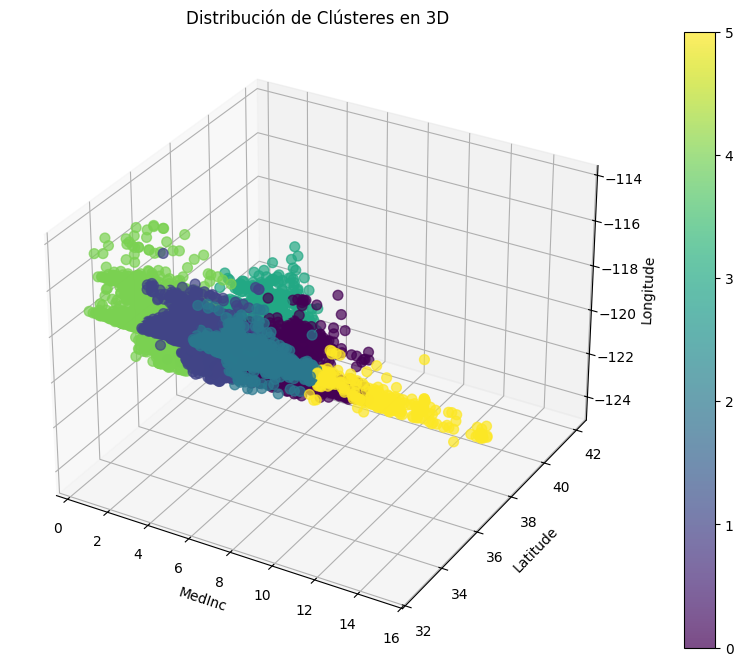

In [40]:
# Se crea la figura para la gráfica:
fig = plt.figure (figsize =(15, 8));

# Se añade un tercer eje para el 3D:
plt_3D = fig.add_subplot(111, projection = '3d');

# Se grafican los puntos en 3D:
scatter = plt_3D.scatter(X_train['MedInc'], X_train['Latitude'], X_train['Longitude'], c = X_train['Cluster'], cmap = 'viridis', s = 50, alpha = 0.7)

# Añadir etiquetas
plt_3D.set_xlabel('MedInc')
plt_3D.set_ylabel('Latitude')
plt_3D.set_zlabel('Longitude')

# Título
plt_3D.set_title('Distribución de Clústeres en 3D')

# Añadir barra de colores para ver la asignación de clusters
plt.colorbar(scatter)

# Mostrar la gráfica
plt.show()


En la gráfica obtenida, se pueden **distinguir claramente los seis grupos definidos**, lo que indica que **K-Means** ha logrado segmentar los datos en esas **6 regiones** y, por lo tanto, la elección del **número de centroides parece acertada**. Teniendo en cuenta la información que contiene el conjunto de datos, se puede decir que los **diferentes grupos censales han sido bien segmentados**. 

La **característica más influyente** parece ser `MedInc`, es decir, el ingreso medio, lo cual refleja el nivel socieconómico del grupo censal. Este eje muestra una **clara separación entre clústers**, con la mayoría concentrados en valores bajos y alguno en altos, **destacando el grupo amarillo** que hace referencia a la **zona más rica de California**. 

Por otro lado, `Loongitude` y `Latitude` **actúan de manera conjunta** para poder obtener información del grupo censal, al *agrupar* regiones que son **cercanas geográficamente**, pero, si se **analiza de forma individual cada uno de sus ejes**, no se obtiene información tan clara como en `MedInc`. 


### Paso 4.2 - Estudio de la Capacidad Predictiva:

Los resultados obtenidos en el apartado anterior han sido muy buenos pero hay que tener en cuenta que **se está prediciendo sobre el mismo conjunto sobre el que se ha entrenado**, lo cual **sesga** bastante los resultados. 

Para poder **estudiar realmente la capacidad predictiva del modelo**, lo necesario es aokucar el modelo entrenado con el *train set* sobre el conjunto de datos de prueba y ver cómo funciona: 

In [41]:
# Se guardan las predicciones de los clusters para cada grupo censal:
X_test ['Cluster'] = kmeans_model.predict(X_test);

# Se comprueba que se ha guardado correctamente la información:
X_test.head()

,MedInc,Latitude,Longitude,Cluster
8572,8.4680,33.90,-118.41,2
1712,3.9722,37.97,-122.32,3
15916,3.4583,37.74,-122.42,3
5196,1.6625,33.94,-118.27,4
13583,1.5156,34.13,-117.29,4


Ahora, tal y como se indica en las instrucciones, para evaluar la fiabilidad del modelo, se van a añadir los puntos del conjunto de prueba, al gráfico anterior:

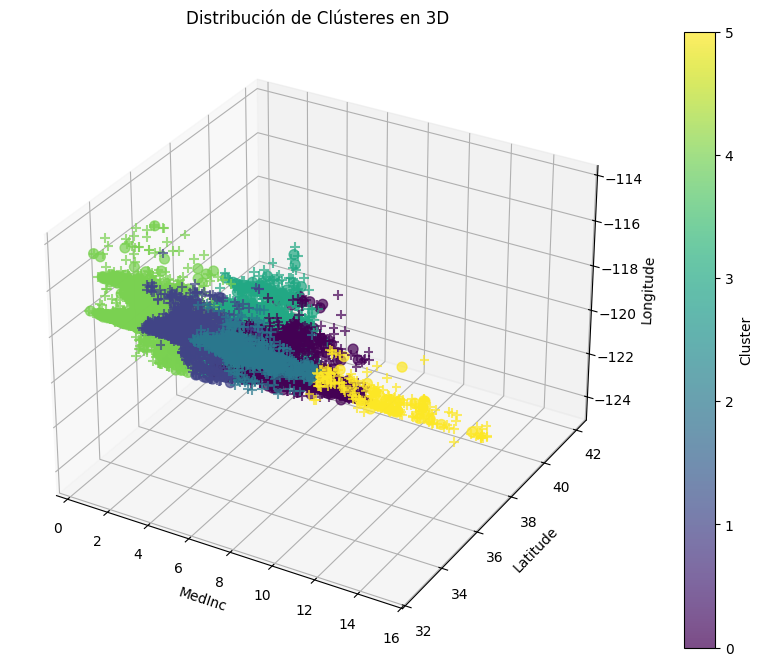

In [42]:
# Se crea la figura para la gráfica:
fig = plt.figure (figsize =(15, 8));

# Se añade un tercer eje para el 3D:
plt_3D = fig.add_subplot(111, projection = '3d');

# Se grafican los puntos del conjunto de entrenamiento en 3D:
scatter_train = plt_3D.scatter(X_train['MedInc'], X_train['Latitude'], X_train['Longitude'], c = X_train['Cluster'], cmap = 'viridis', s = 50, alpha = 0.7, label = 'Train', marker = '+');

# Se grafican los puntos del conjunto de entrenamiento en 3D:
scatter_test = plt_3D.scatter(X_test['MedInc'], X_test['Latitude'], X_test['Longitude'], c = X_test['Cluster'], cmap = 'viridis', s = 50, alpha = 0.7, label = 'Test', marker = 'o');


# Añadir etiquetas
plt_3D.set_xlabel('MedInc');
plt_3D.set_ylabel('Latitude');
plt_3D.set_zlabel('Longitude');

# Título
plt_3D.set_title('Distribución de Clústeres en 3D');

# Añadir barra de colores para ver la asignación de clusters
plt.colorbar(scatter_train, label = 'Cluster');

# Mostrar la gráfica
plt.show();

Por lo que se observa en la gráfica, parece haber una **coherencia total en la asignación de clusters del conjunto de datos de prueba**, con respecto a la que se daba en el conjunto de entrenamiento. Esto implica que el modelo tiene una **buena capcidad predictiva** al mantenerse de forma, más o menos estable, las **fonteras entre clústers**. 

Sin embargo, aunque sea mínimo, sí hay unas **pequeñas áreas de dispersión** donde las predicciones para el conjunto de prueba para un cluster en concreto parecen colarse en el vecino del conjunto de entrenamiento. Pese a ello, como se ha mencionado, el **rendimiento del modelo es muy bueno**. 

## Paso 5 - Estudio de un Algoritmo Supervisado

Una práctica común en este tipo de situaciones es que, cuando se cuenta con **datos no etiquetados**, primero se **etiquetan de forma automática** con un algoritmo de aprendizaje NO supervisado, para luego utilizar un modelo de aprendizaje supervisado. 

Para este tipo de algoritmos, es necesario tener unas **variables independientes y una variable objetivo**. En este caso, las variables independientes está claro que son `MedInc`, `Latitude`, `Longitude` y, como lo que se quiere averiguar es el número del clúster, la columna dependiente será `Cluster`. Por lo que, en primer lugar, es necesario realizar esta **división**:

In [43]:
# Partición en el conjunto de entrenamiento: 
y_train = X_train ['Cluster'];
X_train = X_train [['MedInc', 'Latitude', 'Longitude']];

# Partición en el conjunto de prueba: 
y_test = X_test ['Cluster'];
X_test = X_test [['MedInc', 'Latitude', 'Longitude']];


Para probar esta funcionalidad, se va a utilizar el algoritmo de `Random Forest` con su **optimización de hiperparámetros**. 

Se ha elegido este modelo frente a `Decision Tree` al ser **más complejo** y se ha descartado `Boosting` por el **tiempo de cálculo**. 

In [ ]:
# Se define el modelo de forma general: 
random_forest = RandomForestClassifier(random_state = 42);

# Se define el espacio de búsqueda de hiperparámetros: 
parameters = {
    'n_estimators': randint(30, 100),
    'max_depth': [10, 12, 14, 16],
    'min_samples_leaf': randint(2, 8),
    'max_features': [int(X_train.shape[1] * p) for p in [0.5, 0.7, 0.8, 1.0]]
};

# Se configura la búsqueda en malla con la validación cruzada:
random_search = RandomizedSearchCV(estimator = random_forest, param_distributions = parameters, n_iter = 75, cv = 5, n_jobs = -1, verbose = 1, random_state = 42);

# Se ajusta el modelo con los datos de entrenamiento
random_search.fit(X_train, y_train);

# Se muestran los mejores hiperparámetros encontrados los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {random_search.best_params_}");

# Se evalúa el mejor modelo:
best_random_forest = random_search.best_estimator_;

# Se obtiene la predicción para el conjunto de test:
y_hat_test_forest = best_random_forest.predict(X_test);


Fitting 5 folds for each of 75 candidates, totalling 375 fits


Mejores hiperparámetros: {'max_depth': 12, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 38}


In [53]:
print(f" La precisión obtenida ha sido de {round(accuracy_score(y_test, y_hat_test_forest)*100, 2)}%");

 La precisión obtenida ha sido de 99.64%


El **rendimiento** obtenido con este modelo también ha sido **muy alto**, con una **precisión del 99.64%**.

De esta forma se ha visto que es muy útil realizar un **etiquetado de los datos con K-Means** (algoritmo NO supervisado) para, posteriormente, realizar una **predicción con Random Forest** (algortimo supervisado)